In [2]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
rs = bs.query_history_k_data_plus("sh.600000",
    "Date,Open,High,Low,Close,Volume",
    start_date='2017-07-01', end_date='2019-12-31',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
result.to_csv("sh600000.csv", index=False)
print(result)

#### 登出系统 ####
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           Date     Open     High      Low    Close    Volume
0    2017-07-03  12.6400  12.6500  12.4700  12.5600  38778949
1    2017-07-04  12.5500  12.5800  12.4100  12.5500  36659128
2    2017-07-05  12.5000  12.6500  12.4700  12.6200  26470507
3    2017-07-06  12.6200  12.7200  12.5100  12.6600  37414241
4    2017-07-07  12.6200  12.6900  12.5500  12.6000  24667294
..          ...      ...      ...      ...      ...       ...
607  2019-12-25  12.2900  12.2900  12.2000  12.2400  13678175
608  2019-12-26  12.2600  12.3200  12.2300  12.2900  15739054
609  2019-12-27  12.2500  12.4300  12.2500  12.3200  27932109
610  2019-12-30  12.2700  12.3600  12.1200  12.3400  41051555
611  2019-12-31  12.3200  12.3800  12.2100  12.3700  31953628

[612 rows x 6 columns]
logout success!


In [5]:
dataset = pd.read_csv('sh600000.csv',index_col="Date",parse_dates=True)
dataset.index.name = 'Date'

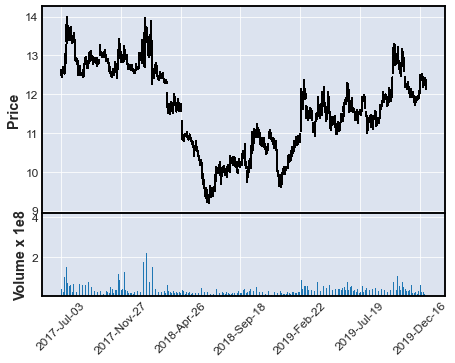

In [6]:
import mplfinance as mpl
mpl.plot(dataset,volume=True)